In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [31]:
with open('data.txt') as f:
    data = f.readlines()

data = data[0]
data = ast.literal_eval(data)

len(data)

Agora, vamos fazer uma série de análises de exploração sobre o conjunto de dados encontrados, inicialmente vamos tratar da população final encontrada no experimento

In [35]:
final_population = []
for i in range(1,len(data)+1):
    final_population.append( data[i][49][3])

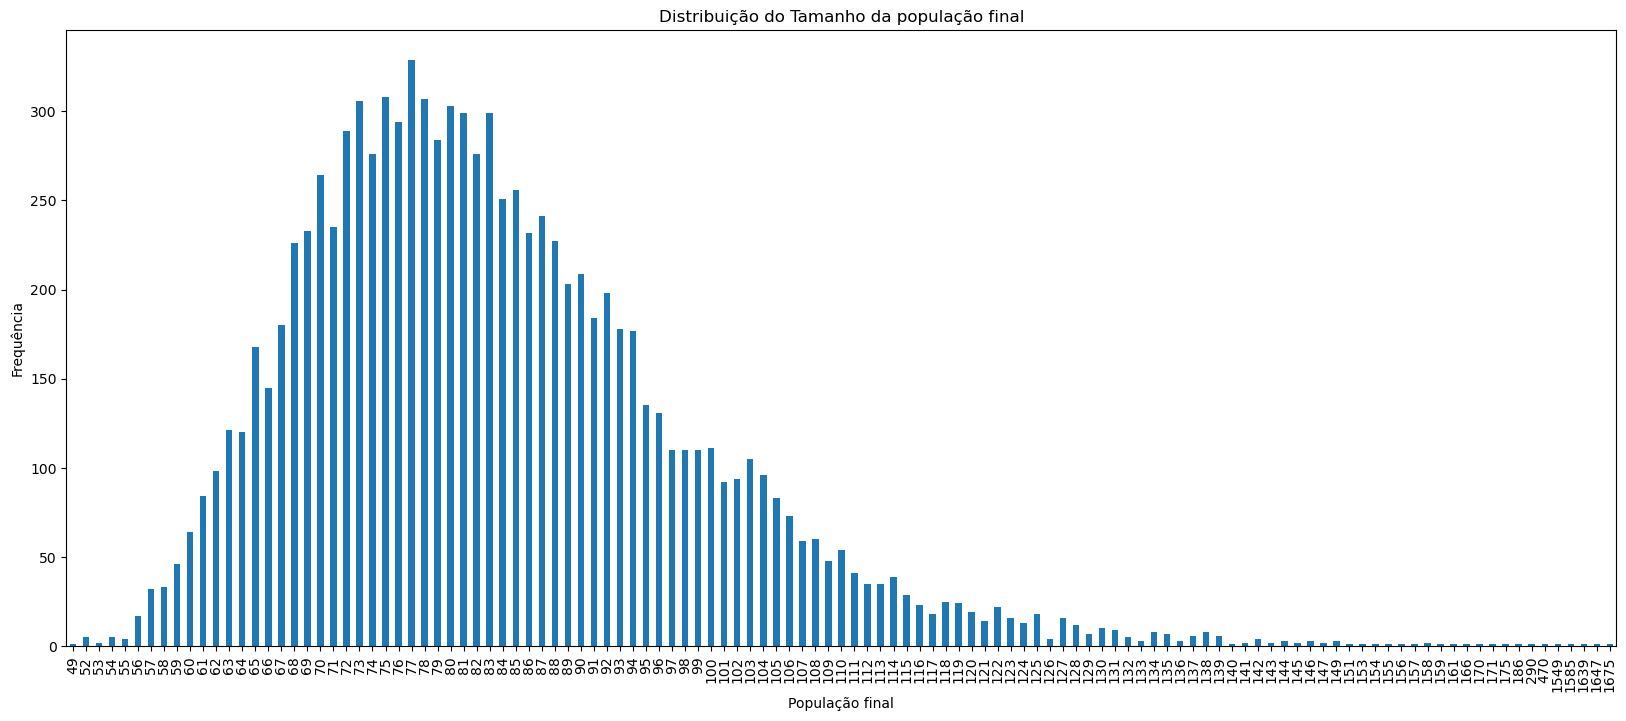

In [43]:
# Exemplo de lista de elementos

# Crie um DataFrame a partir da lista
df = pd.DataFrame(final_population, columns=['População final'])

# Conte a ocorrência de cada valor
contagem = df['População final'].value_counts()
contagem = contagem.sort_index()

# Plote a distribuição
plt.figure(figsize=(20, 8))
contagem.plot(kind='bar')

# Adicione título e rótulos aos eixos
plt.title('Distribuição do Tamanho da população final')
plt.xlabel('População final')
plt.ylabel('Frequência')

# Mostre o gráfico
plt.show()

Insights: 

Investigation: 

Now, lets do a plot containing the distribution for each specific type of population in the same plot for comparision

In [46]:
all_final_population = {'Dominante': [], 'Híbrido': [], 'Recessivo': []}
for i in range(1,len(data)+1):
    all_final_population['Dominante'].append(data[i][49][0])
    all_final_population['Híbrido'].append(data[i][49][1])
    all_final_population['Recessivo'].append(data[i][49][2])

all_final_population = pd.DataFrame(all_final_population)

In [54]:
max(all_final_population['Dominante'])

1395

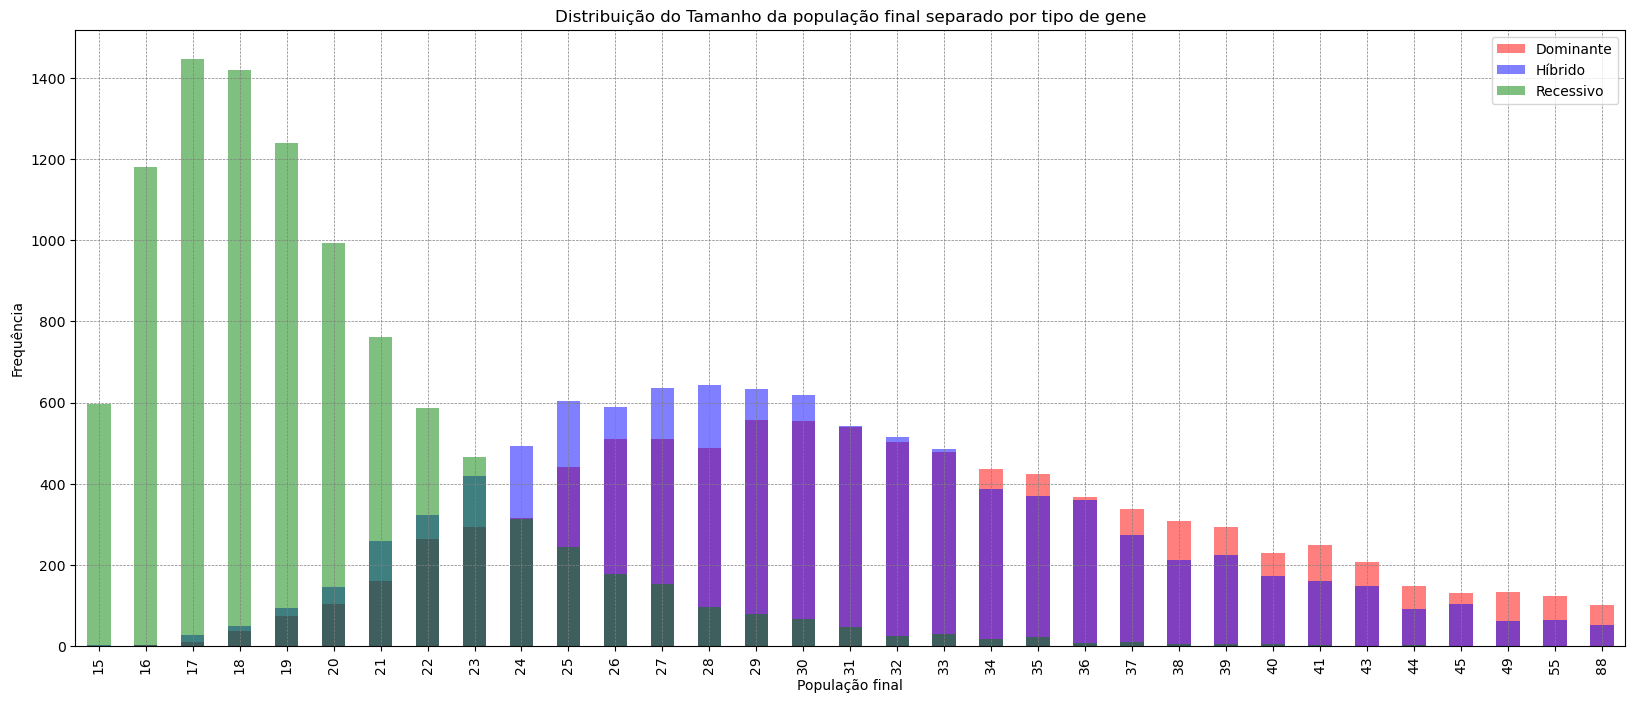

In [53]:
contagem1 = all_final_population['Dominante'].value_counts()
contagem1 = contagem1.sort_index()

contagem2 = all_final_population['Híbrido'].value_counts()
contagem2 = contagem2.sort_index()

contagem3 = all_final_population['Recessivo'].value_counts()
contagem3 = contagem3.sort_index()

plt.figure(figsize=(20, 8))

contagem1.plot(kind='bar', color='red', alpha=0.5, label='Dominante')
contagem2.plot(kind='bar', color='blue', alpha=0.5, label='Híbrido')
contagem3.plot(kind='bar', color='green', alpha=0.5, label='Recessivo')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', zorder=0)
plt.title('Distribuição do Tamanho da população final separado por tipo de gene')
plt.xlabel('População final')
plt.ylabel('Frequência')

plt.legend()

plt.show()

Insights: 

Investigation: 

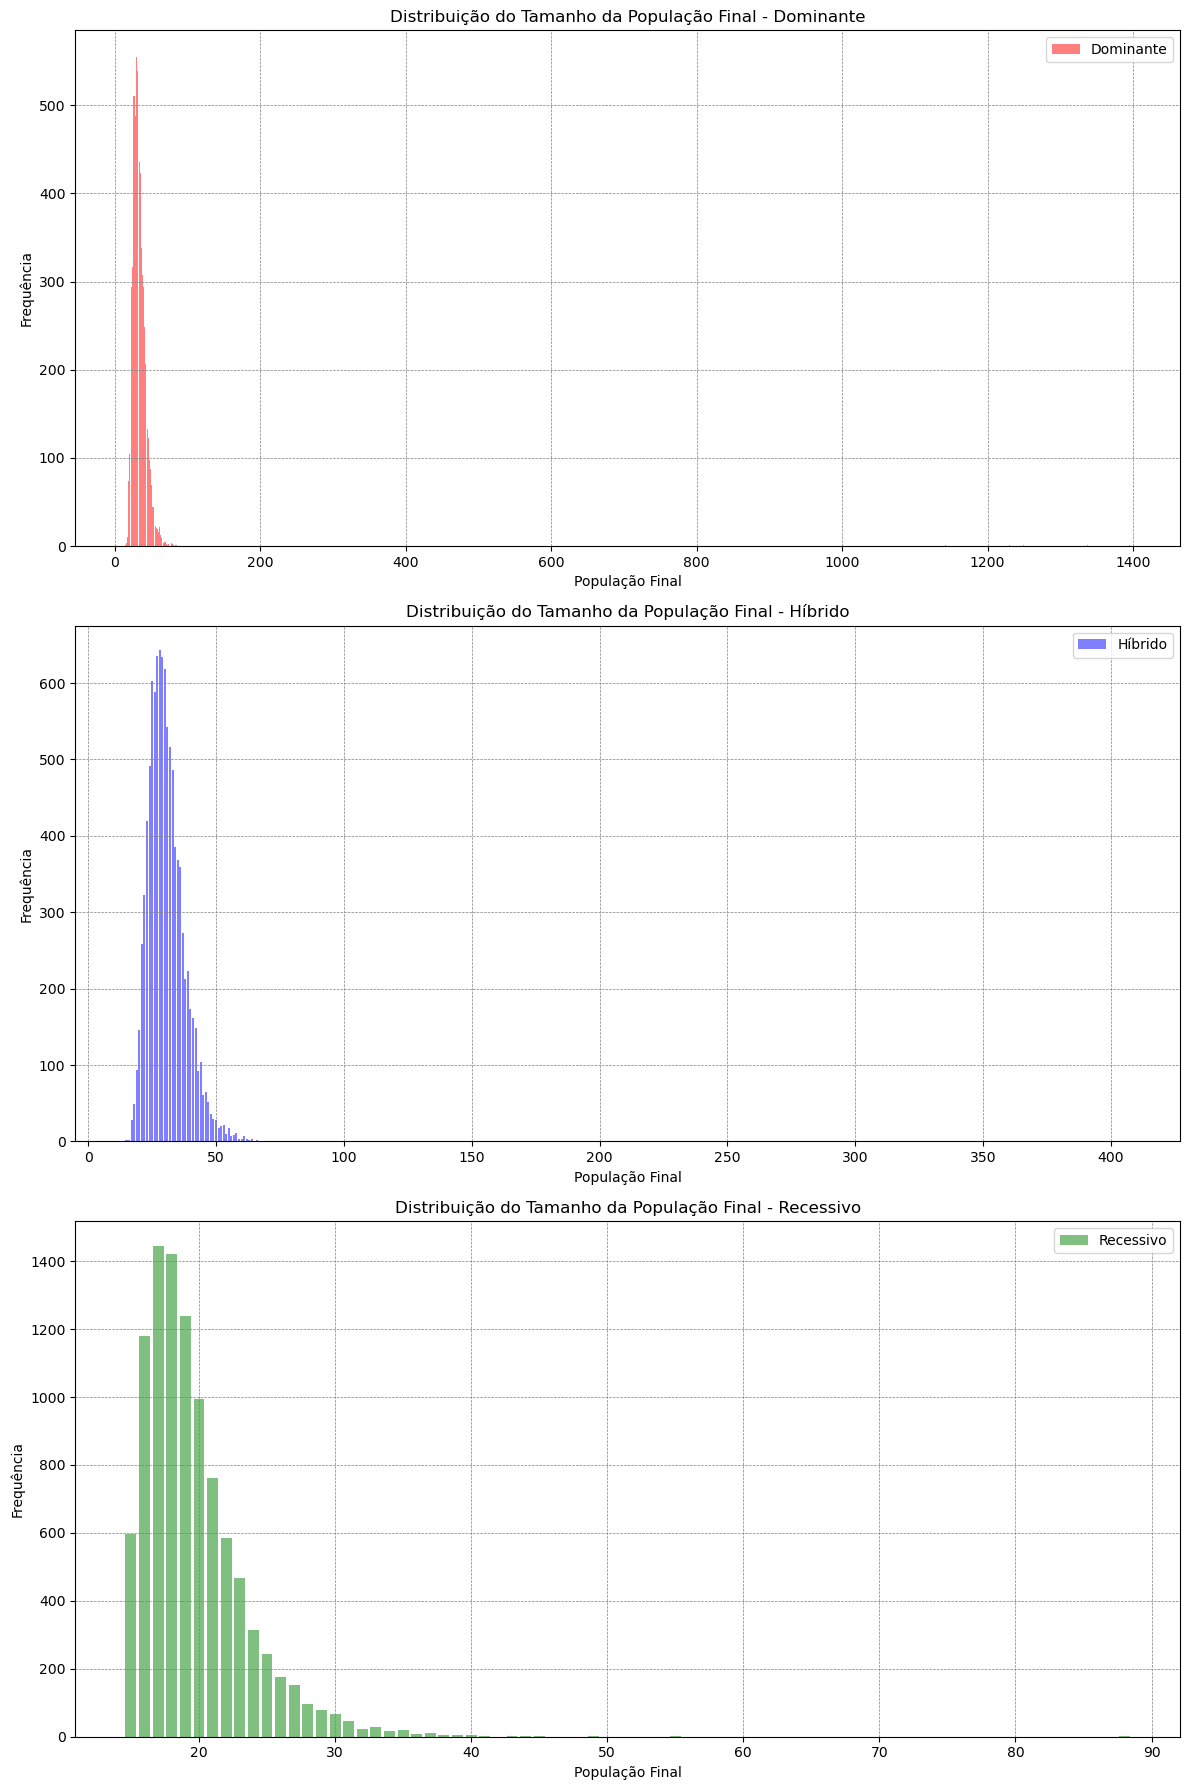

In [55]:

fig, axs = plt.subplots(3, 1, figsize=(12, 18))


axs[0].bar(contagem1.index, contagem1.values, color='red', alpha=0.5, label='Dominante')
axs[0].set_title('Distribuição do Tamanho da População Final - Dominante')
axs[0].set_xlabel('População Final')
axs[0].set_ylabel('Frequência')
axs[0].legend()
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

axs[1].bar(contagem2.index, contagem2.values, color='blue', alpha=0.5, label='Híbrido')
axs[1].set_title('Distribuição do Tamanho da População Final - Híbrido')
axs[1].set_xlabel('População Final')
axs[1].set_ylabel('Frequência')
axs[1].legend()
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')


axs[2].bar(contagem3.index, contagem3.values, color='green', alpha=0.5, label='Recessivo')
axs[2].set_title('Distribuição do Tamanho da População Final - Recessivo')
axs[2].set_xlabel('População Final')
axs[2].set_ylabel('Frequência')
axs[2].legend()
axs[2].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')


plt.tight_layout()

plt.show()

Insights:

Investigation: 

Lets see how the mean of the population behaves throught the generations in the case of this experiment, 50 generations of 20 clocks each.

In [56]:
def calc_mean_gene(data, type:int):
    mean_gene = []	
    
    for j in range(50):
        M = []
        for i in range(1,len(data)+1):
            M.append(data[i][j][type])
        mean_gene.append(np.mean(M))
    
    return mean_gene

mean_gene_dominante = calc_mean_gene(data, 0)
mean_gene_hibrido = calc_mean_gene(data, 1)
mean_gene_recessivo = calc_mean_gene(data, 2)

In [58]:
mean_pop_generations = {'Dominante': mean_gene_dominante, 'Híbrido': mean_gene_hibrido, 'Recessivo': mean_gene_recessivo}
mean_pop_generations = pd.DataFrame(mean_pop_generations)


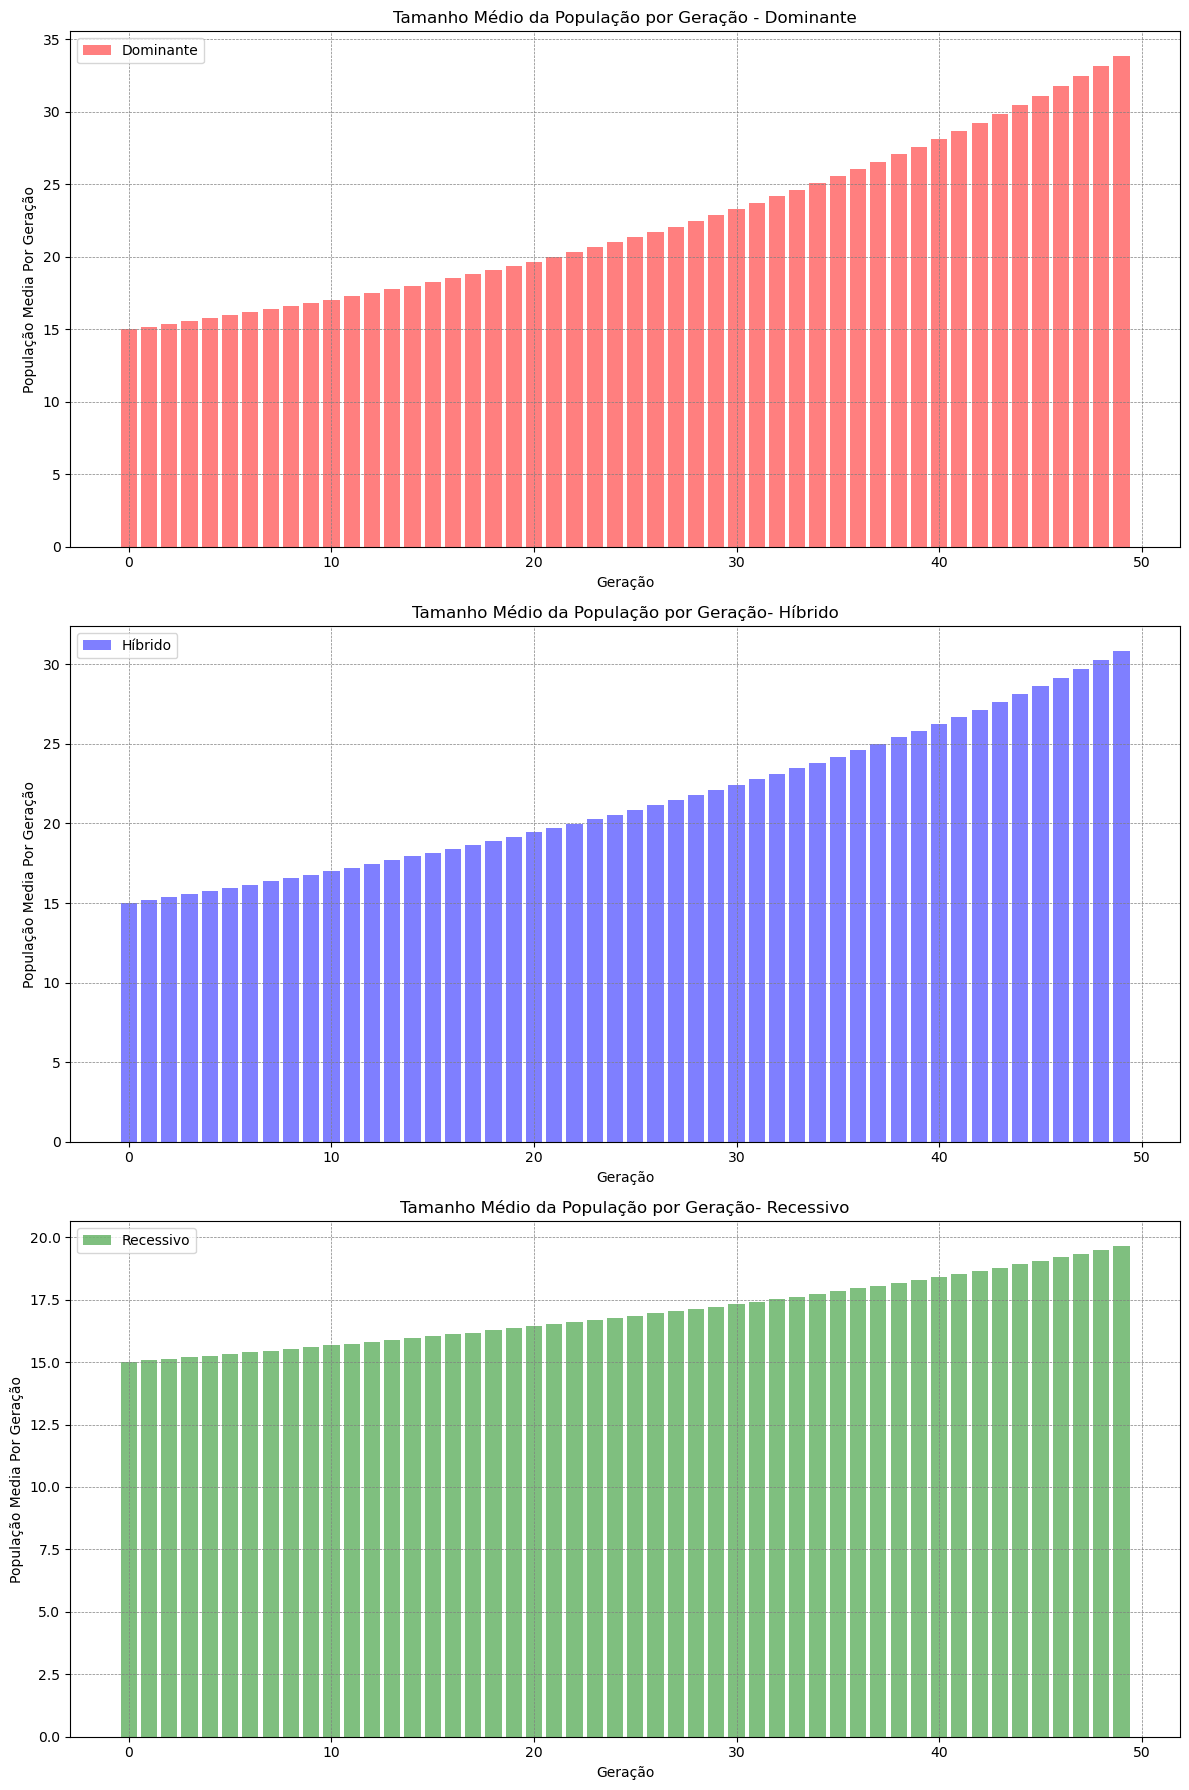

In [60]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))


axs[0].bar(mean_pop_generations['Dominante'].index, mean_pop_generations['Dominante'], color='red', alpha=0.5, label='Dominante')
axs[0].set_title('Tamanho Médio da População por Geração - Dominante')
axs[0].set_xlabel('Geração')
axs[0].set_ylabel('População Media Por Geração')
axs[0].legend()
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

axs[1].bar(mean_pop_generations['Híbrido'].index, mean_pop_generations['Híbrido'], color='blue', alpha=0.5, label='Híbrido')
axs[1].set_title('Tamanho Médio da População por Geração- Híbrido')
axs[1].set_xlabel('Geração')
axs[1].set_ylabel('População Media Por Geração')
axs[1].legend()
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')


axs[2].bar(mean_pop_generations['Recessivo'].index, mean_pop_generations['Recessivo'], color='green', alpha=0.5, label='Recessivo')
axs[2].set_title('Tamanho Médio da População por Geração- Recessivo')
axs[2].set_xlabel('Geração')
axs[2].set_ylabel('População Media Por Geração')
axs[2].legend()
axs[2].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')


plt.tight_layout()

plt.show()

Insights: 

Investigation: 